43


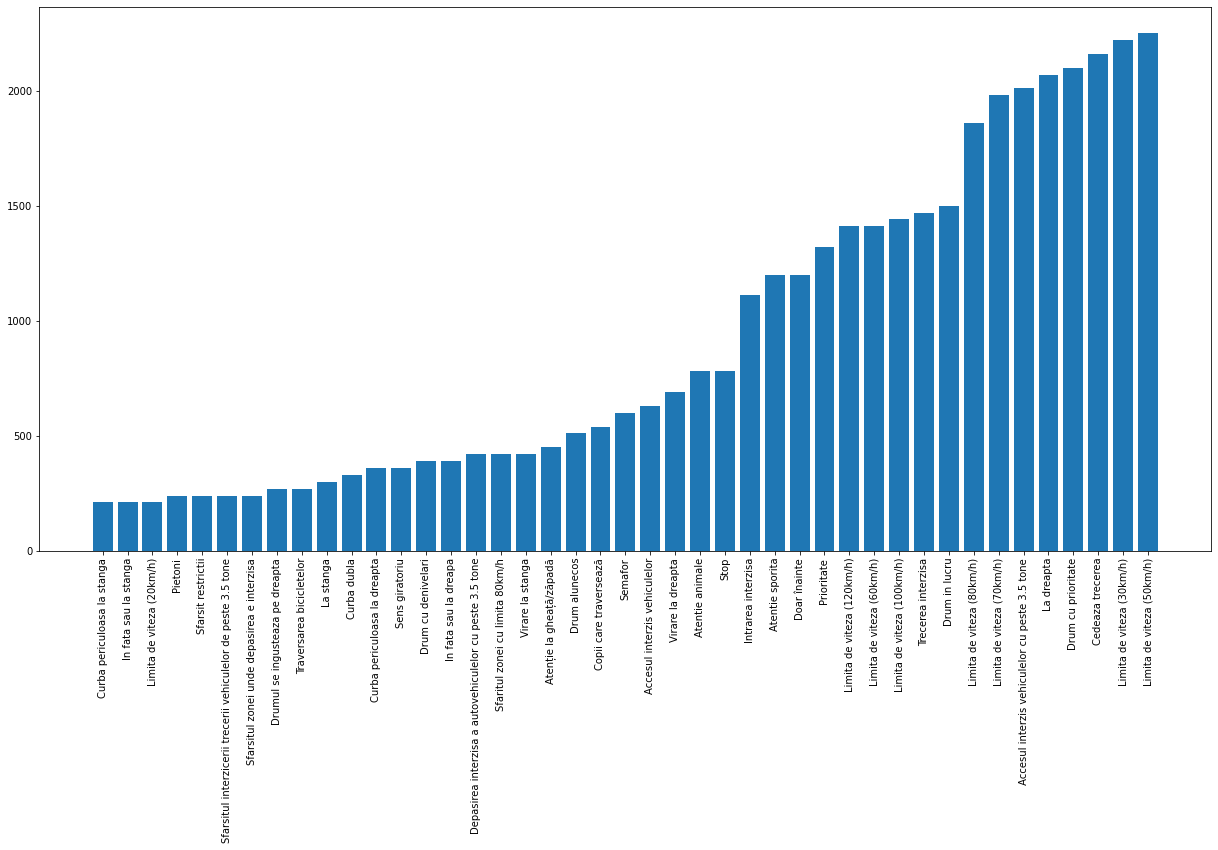

In [13]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
#import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

#from matplotlib import style

#style.use('fivethirtyeight')

data_dir = "C:\\Users\\Marius\\PycharmProjects\\Proiect_VA\\VA"
train_path = 'C:\\Users\\Marius\\PycharmProjects\\Proiect_VA\\VA\\Train'
test_path = 'C:\\Users\\Marius\\PycharmProjects\\Proiect_VA\\VA\\Test'

canale_IMG = 3
latime_IMG = 30
inaltime_IMG = 30

NUMAR_SEMNE = len(os.listdir(train_path))
print(NUMAR_SEMNE)

semne_circulatie = { 0:'Limita de viteza (20km/h)',
            1:'Limita de viteza (30km/h)',
            2:'Limita de viteza (50km/h)',
            3:'Limita de viteza (60km/h)',
            4:'Limita de viteza (70km/h)',
            5:'Limita de viteza (80km/h)',
            6:'Sfaritul zonei cu limita 80km/h',
            7:'Limita de viteza (100km/h)',
            8:'Limita de viteza (120km/h)',
            9:'Trecerea interzisa',
            10:' Accesul interzis vehiculelor cu peste 3.5 tone',
            11:'Prioritate',
            12:'Drum cu prioritate',
            13:'Cedeaza trecerea',
            14:'Stop',
            15:'Accesul interzis vehiculelor',
            16:'Depasirea interzisa a autovehiculelor cu peste 3.5 tone',
            17:'Intrarea interzisa',
            18:'Atentie sporita',
            19:'Curba periculoasa la stanga',
            20:'Curba periculoasa la dreapta',
            21:'Curba dubla',
            22:'Drum cu denivelari',
            23:'Drum alunecos',
            24:'Drumul se ingusteaza pe dreapta',
            25:'Drum in lucru',
            26:'Semafor',
            27:'Pietoni',
            28:'Copii care traversează',
            29:'Traversarea bicicletelor',
            30:'Atenție la gheață/zăpadă',
            31:'Atentie animale',
            32:'Sfarsit restrictii',
            33:'Virare la dreapta',
            34:'Virare la stanga',
            35:'Doar înainte',
            36:'In fata sau la dreapa',
            37:'In fata sau la stanga',
            38:'La dreapta',
            39:'La stanga',
            40:'Sens giratoriu',
            41:'Sfarsitul zonei unde depasirea e interzisa',
            42:'Sfarsitul interzicerii trecerii vehiculelor de peste 3.5 tone' }

folders = os.listdir(train_path)

numar_imagini_antrenare = []
nume_semne_circulatie = []

for folder in folders:
    fisiere_antrenare = os.listdir(train_path + '/' + folder)
    numar_imagini_antrenare.append(len(fisiere_antrenare))
    nume_semne_circulatie.append(semne_circulatie[int(folder)])

# Sortarea setului de date pe baza numărului de imagini din fiecare clasă
zipped_lists = zip(numar_imagini_antrenare, nume_semne_circulatie)
perechi_sortate = sorted(zipped_lists)
tuples = zip(*perechi_sortate)
numar_imagini_antrenare, nume_semne_circulatie = [list(tuple) for tuple in tuples]

# Trasarea numărului de imagini din fiecare clasă
plt.figure(figsize=(21, 10))
plt.bar(nume_semne_circulatie, numar_imagini_antrenare)
plt.xticks(nume_semne_circulatie, rotation='vertical')
plt.show()

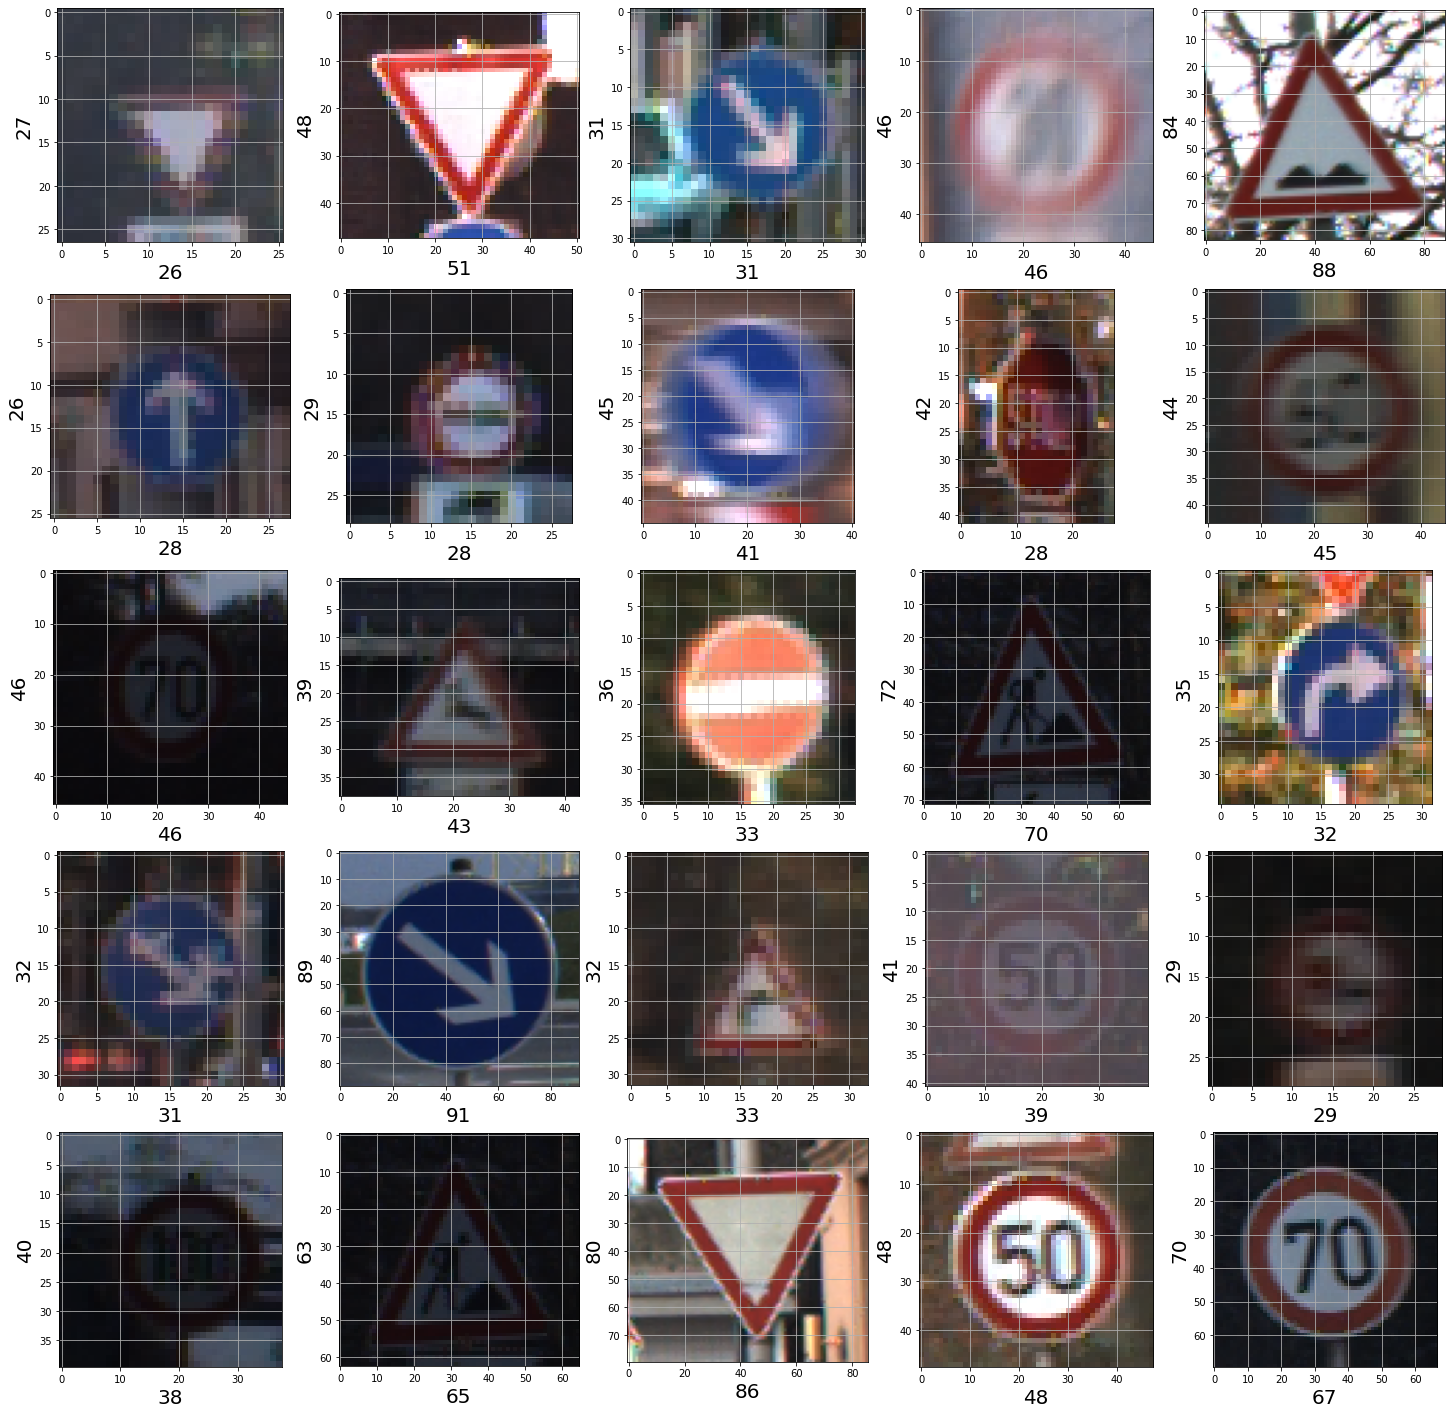

In [14]:
# Vizualizam 25 de imagini aleatorii din datele de testare
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '\\Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '\\' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20) #latime imagini
    plt.ylabel(rand_img.shape[0], fontsize = 20) #inaltime imagini

In [15]:
img_data = []
img_etichete = []

for i in range(NUMAR_SEMNE):
    path = data_dir + '\\Train\\' + str(i)
    imagini = os.listdir(path)

    for img in imagini:
        try:
            image = cv2.imread(path + '\\' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((inaltime_IMG, latime_IMG))
            img_data.append(np.array(resize_image))
            img_etichete.append(i)
        except:
            print("Error in " + img)

# Schimbarea listei în matricea numpy
img_data = np.array(img_data)
img_etichete = np.array(img_etichete)

print(img_data.shape, img_etichete.shape)

(39209, 30, 30, 3) (39209,)


In [17]:
shuffle_indexes = np.arange(img_data.shape[0])
np.random.shuffle(shuffle_indexes)
img_data = img_data[shuffle_indexes]
img_etichete = img_etichete[shuffle_indexes]

In [18]:
X_train, X_val, y_train, y_val = train_test_split(img_data, img_etichete, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 # normalizarea datelor
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [19]:
y_train = keras.utils.to_categorical(y_train, NUMAR_SEMNE)
y_val = keras.utils.to_categorical(y_val, NUMAR_SEMNE)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


In [20]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(inaltime_IMG,latime_IMG,canale_IMG)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

In [21]:
learning_rate = 0.001
epochs = 10

opt = Adam(learning_rate = learning_rate, decay = learning_rate / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [22]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/10
858/858 [==============================] - 58s 60ms/step - loss: 1.0678 - accuracy: 0.7157 - val_loss: 0.0862 - val_accuracy: 0.9716
Epoch 2/10
858/858 [==============================] - 48s 56ms/step - loss: 0.1737 - accuracy: 0.9465 - val_loss: 0.0290 - val_accuracy: 0.9918
Epoch 3/10
858/858 [==============================] - 47s 55ms/step - loss: 0.1019 - accuracy: 0.9690 - val_loss: 0.0228 - val_accuracy: 0.9926
Epoch 4/10
858/858 [==============================] - 49s 57ms/step - loss: 0.0693 - accuracy: 0.9791 - val_loss: 0.0154 - val_accuracy: 0.9954
Epoch 5/10
858/858 [==============================] - 49s 57ms/step - loss: 0.0597 - accuracy: 0.9817 - val_loss: 0.0131 - val_accuracy: 0.9969
Epoch 6/10
858/858 [==============================] - 48s 56ms/step - loss: 0.0450 - accuracy: 0.9858 - val_loss: 0.0114 - val_accuracy: 0.9964
Epoch 7/10
858/858 [==============================] - 47s 55ms/step - loss: 0.0383 - accuracy: 0.9878 - val_loss: 0.0187 - val_accuracy:

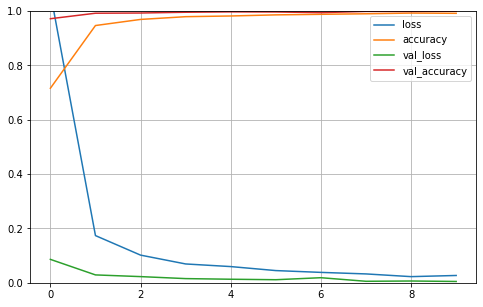

In [23]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [24]:
test = pd.read_csv(data_dir + '//Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '//' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((inaltime_IMG, latime_IMG))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

Test Data accuracy:  98.38479809976248


In [25]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)

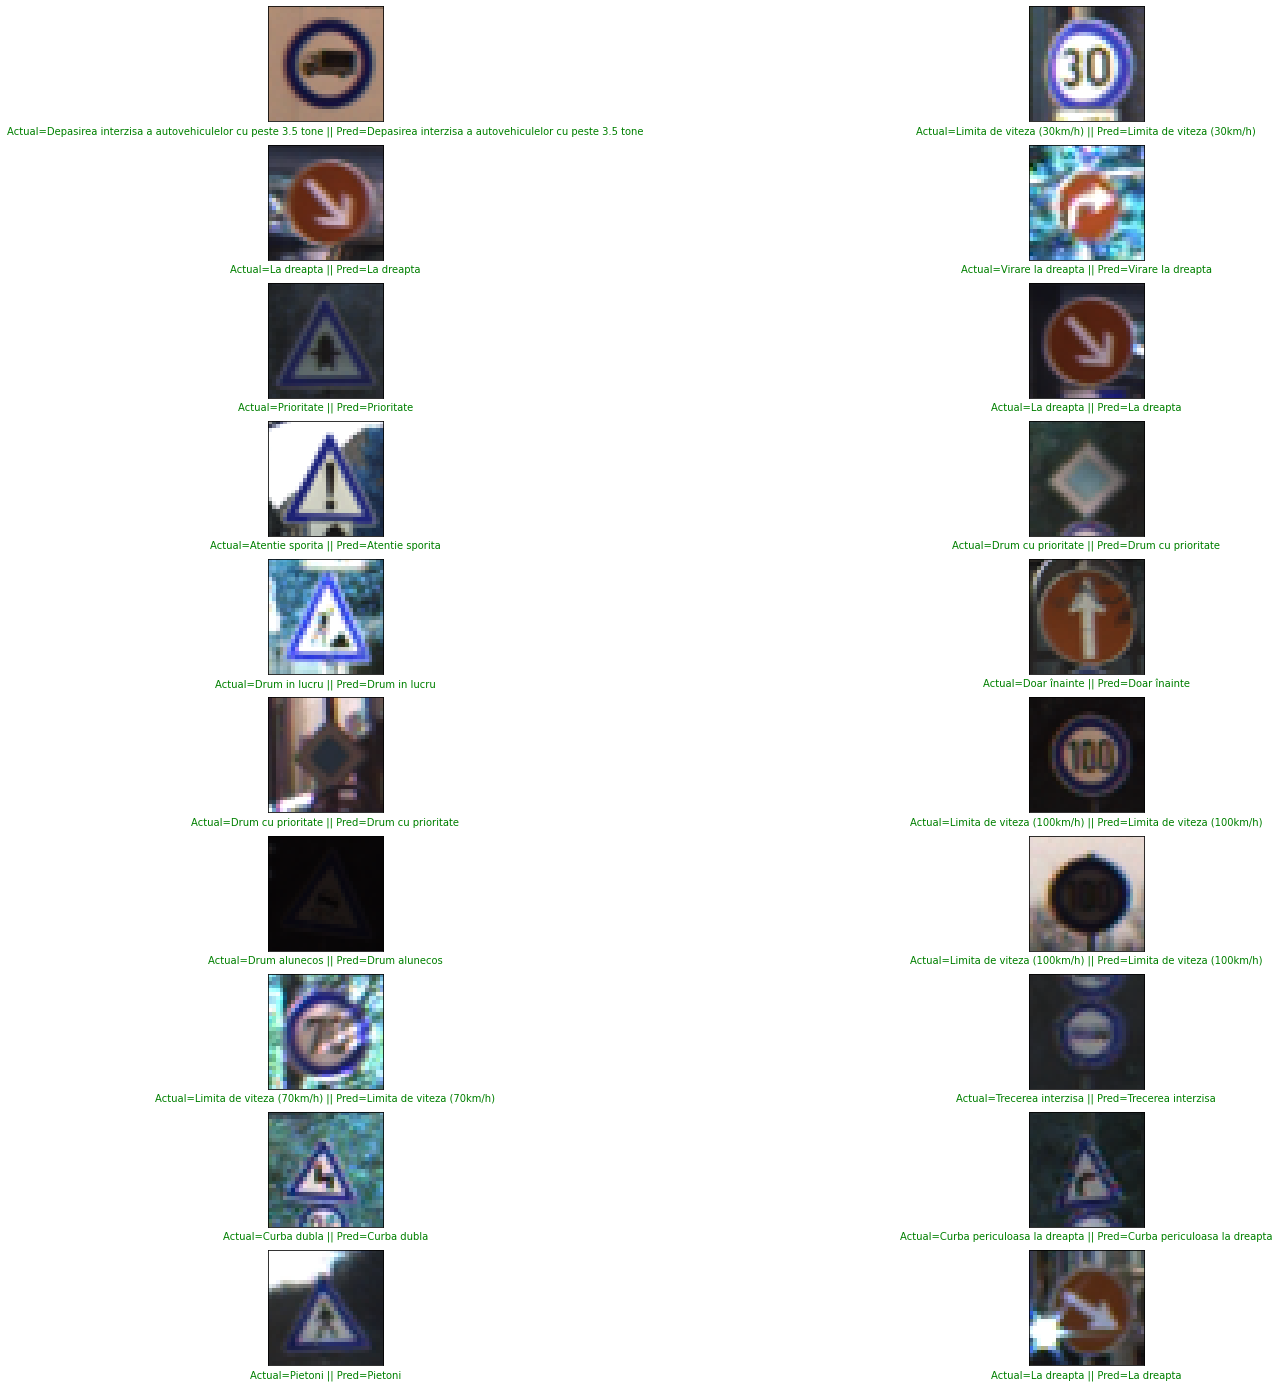

In [30]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(20):
    plt.subplot(10, 2, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(semne_circulatie[actual], semne_circulatie[prediction]), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()